In [3]:
# Trainig VGG，使用colab跑
# cifar10的dataset，使用colab自動下載
# 需要執行，colab連結如下
# https://colab.research.google.com/drive/12sD3--p-Z1jzDRxWMHTDMLkeNfvucs85?usp=sharing

In [2]:
import tensorflow as tf
import os
import numpy as np
import time
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

170508288/170498071 [==============================] - 11s 0us/step


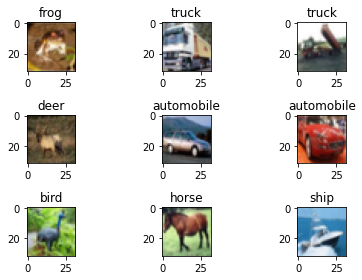

In [4]:
#資料集
dataset_cifar10=tf.keras.datasets.cifar10
((x_train_data, y_train_data), (x_test_data, y_test_data)) = dataset_cifar10.load_data()
#標籤名稱
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
postion_list=[131,132,133,131,132,133,131,132,133]
img_list=[]

#顯示圖案
axes=[]
fig=plt.figure()
for i in range(3*3):
  axes.append(fig.add_subplot(3, 3, i+1) )
  subplot_title=(class_names[int(y_train_data[i])])
  axes[-1].set_title(subplot_title)  
  plt.imshow(x_train_data[i])
fig.tight_layout()    
plt.show()

In [5]:
#正規化
x_train_normaliz, x_test_normaliz = x_train_data / 255.0, x_test_data / 255.0
#參數設定hyperparameters
_batch_size=32
_learning_rate=0.001
_optimizer='SGD'
_epochs=20
print('Batch_Size {}'.format(_batch_size))
print('Learning_Rate {}'.format(_learning_rate))
print('Optimizer {}'.format(_optimizer))

Batch_Size 32
Learning_Rate 0.001
Optimizer SGD


In [6]:
#建立VGG model
vgg_model = tf.keras.models.Sequential([
    #Conv2D_1_1
    Conv2D(64,(3,3),input_shape=(32,32,3),padding='same',activation='relu'),
    #Conv2D_1_2
    Conv2D(64,(3,3),padding='same',activation='relu'),
    #Pool_1
    MaxPooling2D(pool_size=(2,2), strides=2),
    BatchNormalization(),

    ###########################################################
    #Conv2D_2_1
    Conv2D(128,(3,3),padding='same',activation='relu'),
    #Conv2D_2_2
    Conv2D(128,(3,3),padding='same',activation='relu'),
    #Pool_2
    MaxPooling2D(pool_size=(2,2),strides=2),
    BatchNormalization(),

    ###########################################################
    #Conv2D_3_1
    Conv2D(256,(3,3),padding='same',activation='relu'), 
    #Conv2D_3_2
    Conv2D(256,(3,3),padding='same',activation='relu'), 
    #Conv2D_3_3
    Conv2D(256,(3,3),padding='same',activation='relu'), 
    #Pool_3
    MaxPooling2D(pool_size=(2,2),strides=2),
    BatchNormalization(),

    ###########################################################
    #Conv2D_4_1
    Conv2D(512,(3,3),padding='same',activation='relu'), 
    #Conv2D_4_2
    Conv2D(512,(3,3),padding='same',activation='relu'), 
    #Conv2D_4_3
    Conv2D(512,(3,3),padding='same',activation='relu'), 
    BatchNormalization(),
    #Pool_4
    MaxPooling2D(pool_size=(2,2), strides=2),
    
    ###########################################################
    #Conv2D_5_1
    Conv2D(512,(3,3),padding='same',activation='relu'),
    #Conv2D_5_2
    Conv2D(512,(3,3),padding='same',activation='relu'),
    #Conv2D_5_3
    Conv2D(512,(3,3),padding='same',activation='relu'),
    #Pool_5
    MaxPooling2D(pool_size=(2,2),strides=2),
    BatchNormalization(),

    ###########################################################
    #平展成一維
    Flatten(),
    #fully_connected_1
    Dense(4096,activation='relu'),
    #fully_connected_2
    Dense(4096,activation='relu'),
    #輸出softmax機率值
    Dense(10,activation='softmax'),
])

vgg_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

Epoch 1/20
1563/1563 [==============================] - 118s 69ms/step - loss: 1.3994 - accuracy: 0.4908 - val_loss: 1.4390 - val_accuracy: 0.5003
Epoch 2/20
1563/1563 [==============================] - 111s 71ms/step - loss: 0.9254 - accuracy: 0.6739 - val_loss: 0.9986 - val_accuracy: 0.6557
Epoch 3/20
1563/1563 [==============================] - 106s 68ms/step - loss: 0.7040 - accuracy: 0.7563 - val_loss: 1.1141 - val_accuracy: 0.6363
Epoch 4/20
1563/1563 [==============================] - 106s 68ms/step - loss: 0.5624 - accuracy: 0.8052 - val_loss: 0.8155 - val_accuracy: 0.7239
Epoch 5/20
1563/1563 [==============================] - 106s 68ms/step - loss: 0.4461 - accuracy: 0.8462 - val_loss: 0.7557 - val_accuracy: 0.7453
Epoch 6/20
1563/1563 [==============================] - 107s 68ms/step - loss: 0.3498 - accuracy: 0.8785 - val_loss: 0.7752 - val_accuracy: 0.7471
Epoch 7/20
1563/1563 [==============================] - 106s 68ms/step - loss: 0.2781 - accuracy: 0.9042 - val_loss: 1

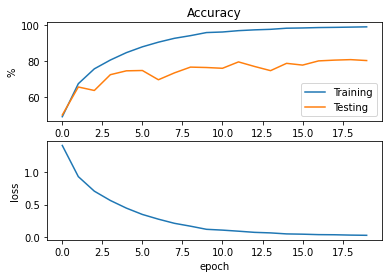

<Figure size 432x288 with 0 Axes>

In [7]:
# Accuracy
def plt_accuracy(train_accuracy_img,test_accuracy_img):
  plt.subplot(2, 1, 1)
  plt.title('Accuracy')
  plt.plot(train_accuracy_img, label='Training')
  plt.plot(test_accuracy_img, label = 'Testing')
  plt.ylabel('%')
  plt.legend(loc='lower right')
# loss
def plt_loss(train_loss_img):
  plt.subplot(2, 1, 2)
  plt.plot(train_loss_img)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

#建立
vgg_model.compile(
  optimizer=_optimizer,
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
  metrics=['accuracy']
)
#訓練
vgg_training = vgg_model.fit(x_train_normaliz, y_train_data, batch_size=_batch_size, epochs=_epochs, validation_data=(x_test_normaliz, y_test_data))
#儲存
vgg_model.save_weights('./vgg.h5')
#輸出圖
train_accuracy_img = np.array(vgg_training.history['accuracy']) * 100
train_loss_img = vgg_training.history['loss']
test_accuracy_img = np.array(vgg_training.history['val_accuracy']) * 100
#畫圖
name_list=['Accuracy']
plt.figure('Accuracy and Loss')
plt_accuracy(train_accuracy_img,test_accuracy_img)
plt_loss(train_loss_img)

plt.savefig('./result.jpg')